## Imports von allen Bibliotheken

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

## Einlesen des Datensatzes

Daten von https://www.kaggle.com/datasets/datamunge/sign-language-mnist?resource=download



In [ ]:
#Import
# Pfad zur CSV-Datei
train_file_path = "/sign_mnist_train.csv"
test_file_path = "/sign_mnist_test.csv"

# Daten laden
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

## Daten anzeigen

In [ ]:
# Ein kurzer Blick auf die Daten
print("Trainingsdaten Vorschau:")
print(train_data.head())

# Labels und Bilder aus den Trainingsdaten extrahieren
y_train = train_data.iloc[:, 0].values  # Labels (erste Spalte)
X_train = train_data.iloc[:, 1:].values  # Pixelwerte (Rest)

# Labels und Bilder aus den Testdaten extrahieren
y_test = test_data.iloc[:, 0].values  # Labels (erste Spalte)
X_test = test_data.iloc[:, 1:].values  # Pixelwerte (Rest)

Trainingsdaten Vorschau:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0    

In [ ]:
#Ausgabe der einzelnen Labels im Dataframe und Ausgeben der Anzahl
labels = train_data["label"].unique().tolist()
labels.sort()
print("Labels in the Dataframe:", str(labels)+" \nCount of different labels:", len(labels))

Labels in the Dataframe: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24] 
Count of different labels: 24


## Mappingliste zu den Labels

In [ ]:
#Liste für die Umsetzung von Labels zu Buchstaben
#j als Platzhalter könnte auch leerer string sein
translation_list = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y"]

## Visualiserung der vorhandenen Daten pro Label

Shape von train_data: (27455, 785)


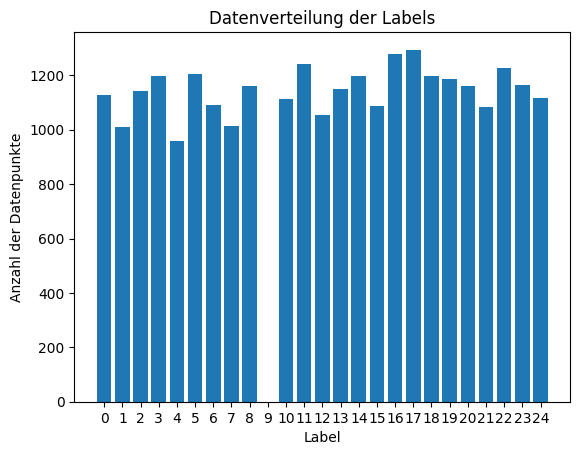

In [ ]:
# Zähle das Vorkommen jedes Labels
label_counts = np.bincount(y_train)
#Shape von train_data
print("Shape von train_data:", train_data.shape)

#Balkendiagramm zur Verteilung der Labels
labels = np.arange(len(label_counts))  # Beschriftungen für die x-Achse
plt.bar(labels, label_counts)
# Beschriftungen und Titel hinzufügen
plt.xlabel("Label")
plt.ylabel("Anzahl der Datenpunkte")
plt.title("Datenverteilung der Labels")
# X-Achsen-Beschriftungen anpassen
plt.xticks(labels)
plt.show()

<Axes: xlabel='label'>

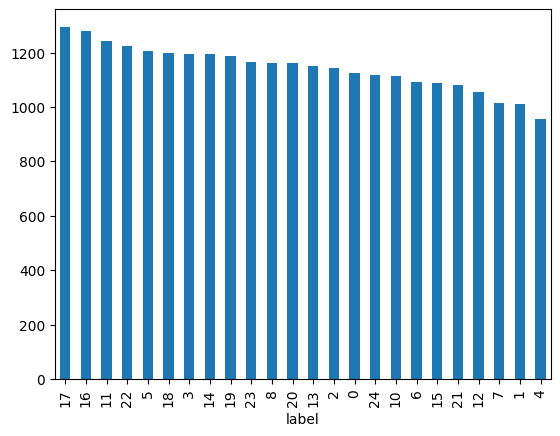

In [ ]:
#Balkendiagramm wie oft jedes Label vorkommt
train_data.value_counts("label").plot.bar()

## Analyse des Dataframes

In [ ]:
#Ausgabe der Informationen des Dataframes wie zum Beispiel das er nur Intger Werte enthält
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


## Ausgabe 1. Image

Text(0.5, 1.0, 'Integer for this Character:d')

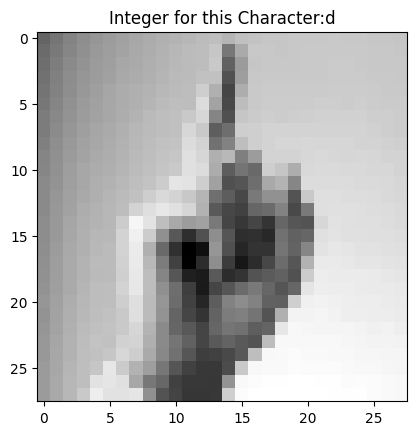

In [ ]:
#Ausgabe Beispiel Bild (erstes des Dataframes)
img_df=train_data.drop(columns= "label")
label=train_data.iloc[0,0]
img = img_df.iloc[0]
npimg = np.array(img).reshape(28,28)
name = translation_list[label]

plt.imshow(npimg, cmap="grey")
plt.title("Integer for this Character:"+str(name))

## Ausgabe von einem Bild für jeden Buchstaben

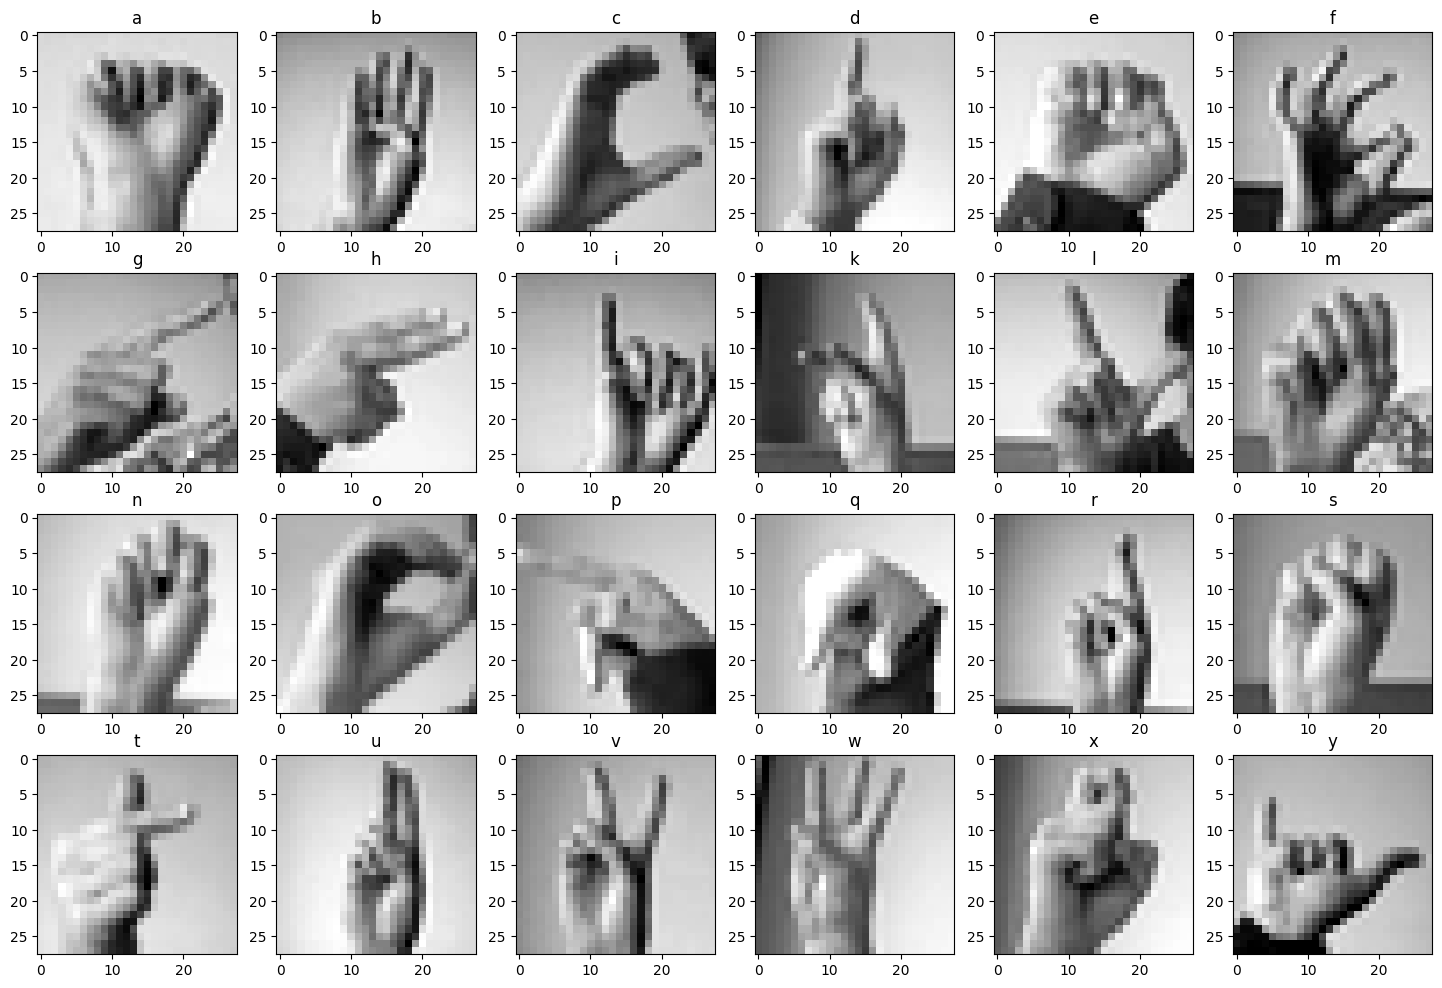

In [ ]:
#Ausgabe von einem Bild für jeden Buchstaben
#https://www.kaggle.com/code/madz2000/cnn-using-keras-100-accuracy
#https://matplotlib.org/stable/api/pyplot_summary.html
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots, https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html,
#size is 6 by 4 so as figsize we use 18 / 6 *4 = 12 (as this is mathematically adjusted for the amount of images per rox/col)
x=0
figure, location = plt.subplots(4,6, figsize= (18,12))
label =""
for row in range (4):
    for col in range (6):
        df_filtered = train_data[train_data["label"]==x]
        label_nr =  df_filtered["label"].iloc[0]
        label = translation_list[label_nr]
        loop_img = df_filtered.drop(columns="label").iloc[0]
        loop_npimg = np.array(loop_img).reshape(28,28)

        location[row,col].imshow(loop_npimg,cmap="grey", interpolation = "antialiased")
        location[row,col].set_title(label)
        x+=1
        if(x == 9):
            x+=1

# Beispielausgabe von normalisiertem Bild

In [ ]:
#normalisierung und anpassung
test_img = (np.asarray(img, dtype=float)/255.0*0.99)+0.01

test_img

array([0.42541176, 0.46811765, 0.50305882, 0.53023529, 0.54964706,
       0.56517647, 0.57682353, 0.59235294, 0.604     , 0.61564706,
       0.62341176, 0.63117647, 0.64282353, 0.65058824, 0.62729412,
       0.65447059, 0.66223529, 0.67      , 0.67      , 0.67388235,
       0.67388235, 0.67388235, 0.67776471, 0.67388235, 0.67388235,
       0.67      , 0.67      , 0.66611765, 0.44094118, 0.47976471,
       0.51082353, 0.53411765, 0.55741176, 0.56905882, 0.58458824,
       0.59623529, 0.60788235, 0.61952941, 0.63117647, 0.64282353,
       0.64670588, 0.67      , 0.472     , 0.60011765, 0.67388235,
       0.67388235, 0.67      , 0.67388235, 0.67776471, 0.67776471,
       0.67776471, 0.67776471, 0.67776471, 0.67388235, 0.67388235,
       0.67      , 0.44870588, 0.48752941, 0.51858824, 0.54188235,
       0.56129412, 0.57294118, 0.59235294, 0.60011765, 0.61176471,
       0.62341176, 0.63505882, 0.64282353, 0.64670588, 0.67776471,
       0.41764706, 0.56129412, 0.67      , 0.67388235, 0.67388

## Daten vorbereiten

In [ ]:
#Aufbereitung
# Labels und Bilder aus den Trainingsdaten extrahieren
y_train = train_data.iloc[:, 0].values  # Labels (erste Spalte)
X_train = train_data.iloc[:, 1:].values  # Pixelwerte (Rest)

# Labels und Bilder aus den Testdaten extrahieren
y_test = test_data.iloc[:, 0].values  # Labels (erste Spalte)
X_test = test_data.iloc[:, 1:].values  # Pixelwerte (Rest)

# Daten normalisieren
X_train = X_train / (255.0*0.99)+0.01
X_test = X_test / (255.0*0.99)+0.01

# Daten in PyTorch-Tensoren umwandeln und für CNN vorbereiten
X_train = torch.tensor(X_train, dtype=torch.float32).view(-1, 1, 28, 28)  # (Batch, Channel, Height, Width)
X_test = torch.tensor(X_test, dtype=torch.float32).view(-1, 1, 28, 28)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# 0 als Untergrenze definieren
y_train = torch.clamp(y_train, 0)
y_test = torch.clamp(y_test, 0)

# Dataloader erstellen
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

## CNN Klasse anlegen

In [ ]:
#CNN Model
class SignLanguageCNN(nn.Module):
    def __init__(self):
        super(SignLanguageCNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 3 * 3, 25)
        )

    def forward(self, x, epoch=None):
        x = self.cnn(x)
        x = self.fc(x)
        return x


## Training des Modells

In [ ]:
#Training und Evaluation
# Modell initialisieren
model = SignLanguageCNN()
criterion = nn.CrossEntropyLoss()  # Verlustfunktion
optimizer = optim.Adam(model.parameters(), lr=0.002)  # Adam-Optimizer

# Training
num_epochs = 11

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Seed für Reproduzierbarkeit
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

for epoch in range(num_epochs):
    # Trainingsmodus
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
        # Fortschrittsbalken mit dynamischem Update
    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", position=0, leave=True) as pbar:
        for inputs, labels in pbar:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Berechnung der Trainingsgenauigkeit
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

           # Fortschrittsbalken dynamisch aktualisieren
            pbar.set_postfix({
                'Loss': f"{loss.item():.4f}",
                'Accuracy': f"{(correct_train / total_train) * 100:.2f}%"
            })

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct_train / total_train)



    # Validierungsmodus
    model.eval()
    valid_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)

            loss = criterion(outputs, labels)
            valid_loss += loss.item()

            # Berechnung der Validierungsgenauigkeit
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    test_losses.append(valid_loss / len(test_loader))
    test_accuracies.append(correct_test / total_test)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")
    print(f"Train Accuracy: {train_accuracies[-1]*100:.2f}%, Test Accuracy: {test_accuracies[-1]*100:.2f}%")

# Labels und Vorhersagen sammeln
y_true = []
y_pred = []

# Evaluation für die Plots
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())


Epoch 1/11: 100%|██████████| 108/108 [01:08<00:00,  1.57it/s, Loss=0.4953, Accuracy=44.21%]


Epoch 1/11, Train Loss: 1.7848, Test Loss: 1.4748
Train Accuracy: 44.21%, Test Accuracy: 80.94%


Epoch 2/11: 100%|██████████| 108/108 [01:15<00:00,  1.44it/s, Loss=0.1825, Accuracy=86.92%]


Epoch 2/11, Train Loss: 0.3701, Test Loss: 0.9039
Train Accuracy: 86.92%, Test Accuracy: 92.28%


Epoch 3/11: 100%|██████████| 108/108 [01:04<00:00,  1.66it/s, Loss=0.3191, Accuracy=93.80%]


Epoch 3/11, Train Loss: 0.1773, Test Loss: 0.6576
Train Accuracy: 93.80%, Test Accuracy: 91.97%


Epoch 4/11: 100%|██████████| 108/108 [01:08<00:00,  1.57it/s, Loss=0.0757, Accuracy=95.78%]


Epoch 4/11, Train Loss: 0.1189, Test Loss: 0.5464
Train Accuracy: 95.78%, Test Accuracy: 93.20%


Epoch 5/11: 100%|██████████| 108/108 [01:06<00:00,  1.61it/s, Loss=0.0376, Accuracy=96.78%]


Epoch 5/11, Train Loss: 0.0927, Test Loss: 0.5424
Train Accuracy: 96.78%, Test Accuracy: 92.39%


Epoch 6/11: 100%|██████████| 108/108 [01:05<00:00,  1.65it/s, Loss=0.0478, Accuracy=97.24%]


Epoch 6/11, Train Loss: 0.0780, Test Loss: 0.4343
Train Accuracy: 97.24%, Test Accuracy: 93.29%


Epoch 7/11: 100%|██████████| 108/108 [01:07<00:00,  1.61it/s, Loss=0.0307, Accuracy=97.71%]


Epoch 7/11, Train Loss: 0.0642, Test Loss: 0.3931
Train Accuracy: 97.71%, Test Accuracy: 94.95%


Epoch 8/11: 100%|██████████| 108/108 [01:06<00:00,  1.61it/s, Loss=0.0414, Accuracy=98.45%]


Epoch 8/11, Train Loss: 0.0445, Test Loss: 0.3605
Train Accuracy: 98.45%, Test Accuracy: 95.40%


Epoch 9/11: 100%|██████████| 108/108 [01:09<00:00,  1.55it/s, Loss=0.0079, Accuracy=98.34%]


Epoch 9/11, Train Loss: 0.0491, Test Loss: 0.3622
Train Accuracy: 98.34%, Test Accuracy: 95.08%


Epoch 10/11: 100%|██████████| 108/108 [01:06<00:00,  1.62it/s, Loss=0.0406, Accuracy=98.33%]


Epoch 10/11, Train Loss: 0.0491, Test Loss: 0.3656
Train Accuracy: 98.33%, Test Accuracy: 95.41%


Epoch 11/11: 100%|██████████| 108/108 [01:05<00:00,  1.65it/s, Loss=0.0624, Accuracy=98.62%]


Epoch 11/11, Train Loss: 0.0397, Test Loss: 0.2647
Train Accuracy: 98.62%, Test Accuracy: 95.89%


## Evaluation der Ergebnisse

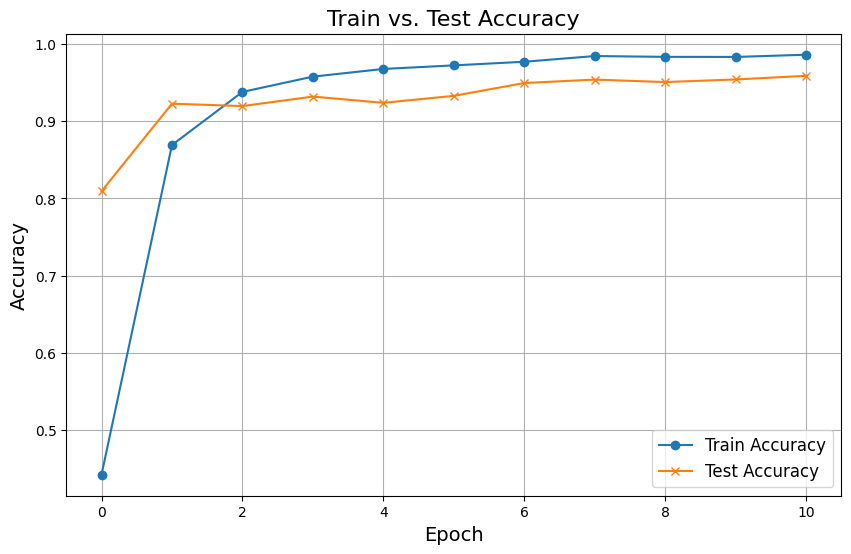

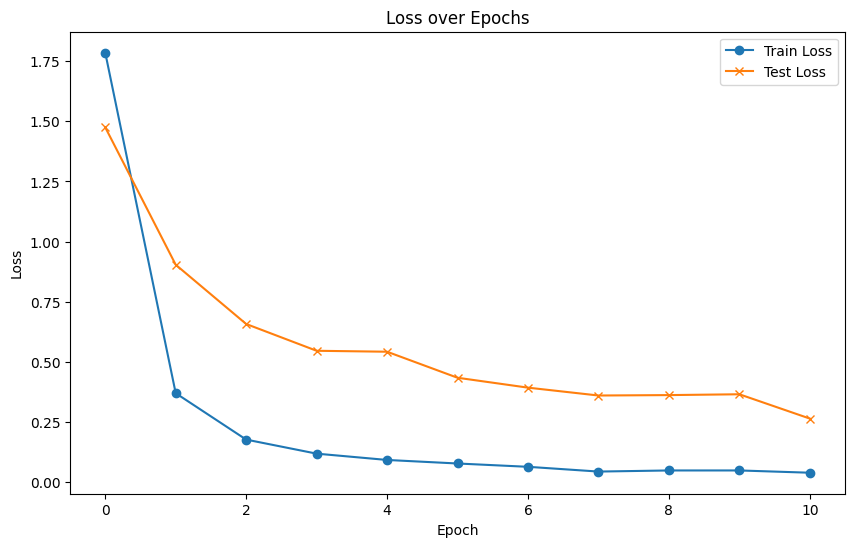

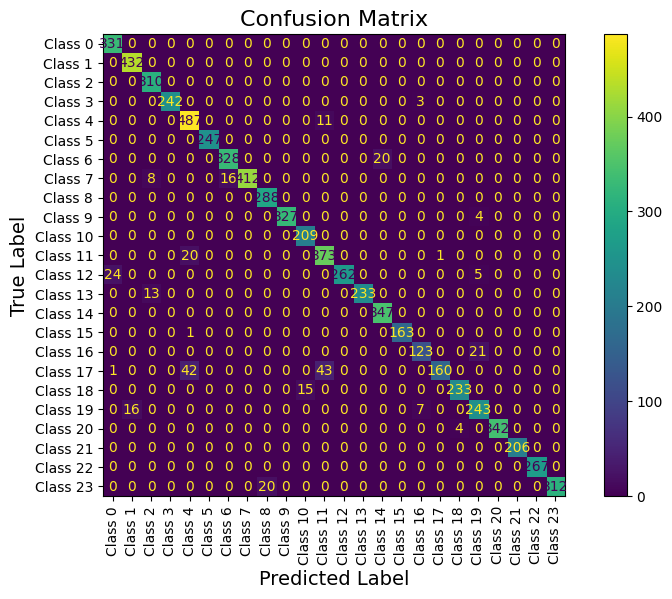

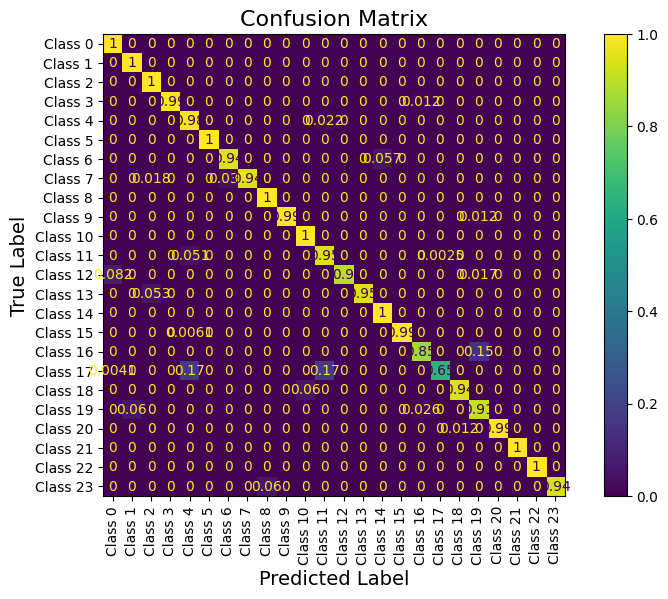

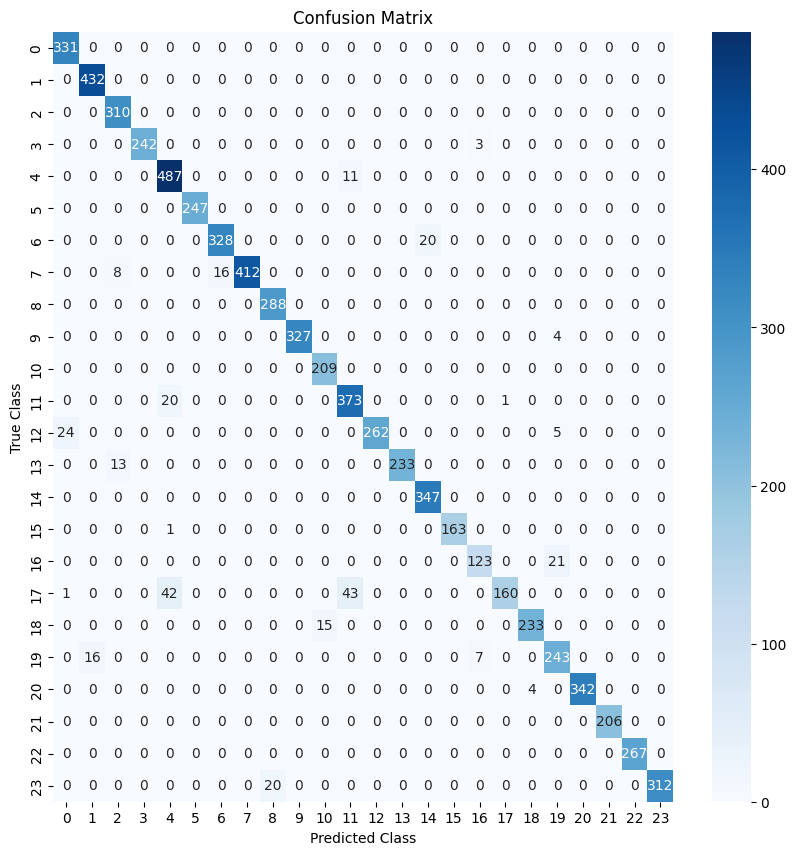

In [ ]:
# Plot der Genauigkeiten
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label="Train Accuracy", marker='o')  # Trainingsgenauigkeit plotten
plt.plot(test_accuracies, label="Test Accuracy", marker='x')    # Testgenauigkeit plotten
plt.title("Train vs. Test Accuracy", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss", marker = "o")  # Trainingsverlust plotten
plt.plot(test_losses, label="Test Loss", marker = "x") #Testverlust Plotten
plt.legend()
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Konfusionsmatrix erstellen
cm = confusion_matrix(y_true, y_pred)
# Visualisierung der Konfusionsmatrix
fig, ax = plt.subplots(figsize=(10, 6))  # Größe festlegen
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Class {i}" for i in range(len(cm))])
disp.plot(cmap="viridis", xticks_rotation="vertical", ax=ax, colorbar=True)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.grid(False)
plt.show()

# Konfusionsmatrix normalisiert
cm = confusion_matrix(y_true, y_pred, normalize='true')
# Visualisierung der Konfusionsmatrix
fig, ax = plt.subplots(figsize=(10, 6))  # Größe festlegen
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Class {i}" for i in range(len(cm))])
disp.plot(cmap="viridis", xticks_rotation="vertical", ax=ax, colorbar=True)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.grid(False)
plt.show()

# Erstelle die Verwechslungsmatrix
cm = confusion_matrix(y_true, y_pred)

# Visualisierung der Konfusionsmatrix mit Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

## Modell und Gewicht speichern

In [ ]:
#Modell Speichern
torch.save(model.state_dict(), "sign_language_cnn.pth")
print("Modell gespeichert!")

Modell gespeichert!


In [ ]:
#Modell Downloaden
from google.colab import files
files.download("sign_language_cnn.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Laden des Modells
model.load_state_dict(torch.load("sign_language_cnn.pth"))
model.eval()  # Setzt das Modell in den Evaluierungsmodus



NameError: name 'model' is not defined

## Demo

<class 'numpy.ndarray'>
[[252 248 243 ... 195 198 203]
 [252 248 243 ... 195 197 200]
 [252 248 243 ... 195 195 196]
 ...
 [255 251 244 ... 131 152 187]
 [250 244 244 ... 178 187 203]
 [255 250 251 ... 203 207 215]]
<class 'tuple'>


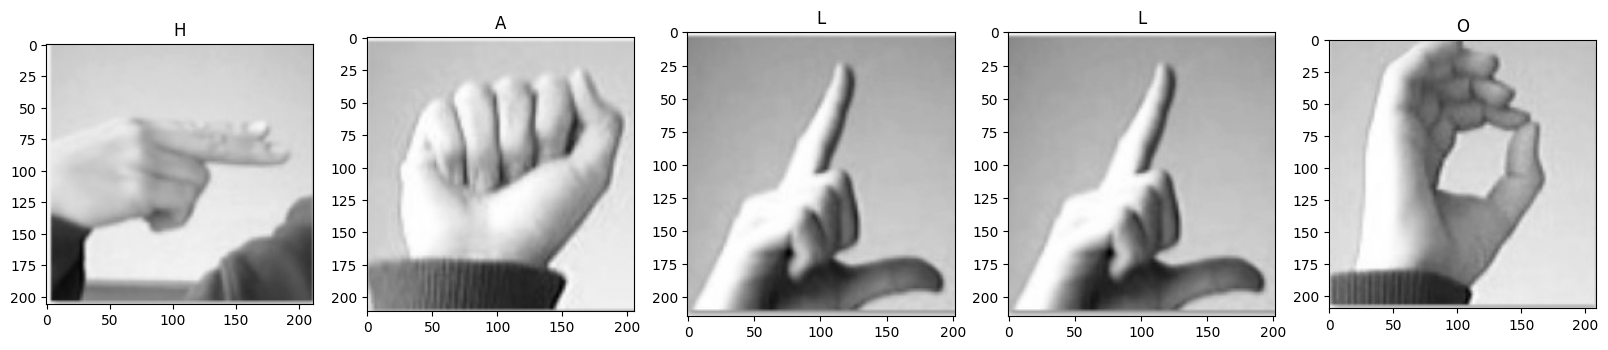

In [ ]:
import cv2 as cv

# Bilder einlesen (screenshots von amer_sign2.png)
img1 = cv.imread("/screenshotHsignpng2.jpg")
img2 = cv.imread("/screenshotAsignpng2.jpg")
img3 = cv.imread("/screenshotLsignpng2.jpg")
img4 = cv.imread("/screenshotLsignpng2.jpg")
img5 = cv.imread("/screenshotOsignpng2.jpg")

# Konvertiere Bilder in Graustufen
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)
img5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

#Bilder und Labels ausgeben
figure, location = plt.subplots(1,5, figsize= (20,5))
location[0].imshow(img1,cmap="grey", interpolation = "antialiased")
location[1].imshow(img2,cmap="grey", interpolation = "antialiased")
location[2].imshow(img3,cmap="grey", interpolation = "antialiased")
location[3].imshow(img4,cmap="grey", interpolation = "antialiased")
location[4].imshow(img5,cmap="grey", interpolation = "antialiased")

location[0].set_title("H")
location[1].set_title("A")
location[2].set_title("L")
location[3].set_title("L")
location[4].set_title("O")

# Datentyp prüfen
print(type(img1))
print(img1)

# Bilder in einem Tuple speichern
imgList = (img1, img2, img3, img4, img5)
print(type(imgList))


In [ ]:
# Variable für die Übersetzung
word = ""

# Schleife in der das Bild vorhergesagt wird und wert an der die Variable angehängt wird
model.eval()
for img in imgList:
    img_tensor = torch.from_numpy(cv.resize(img, (28, 28))).float().unsqueeze(0).unsqueeze(0)

    # Tensor für die Vorhersage an das Model übergeben
    result = model(img_tensor)

    # Ergebnis erhalten
    _, predicted_label = torch.max(result, 1)
    char = translation_list[predicted_label.item()]

    # Buchstaben an das Wort anhängen
    word += char

# Ausgabe des Wortes
print("Predicted word:", word)

Predicted word: hallo
